In [1]:
import mysql.connector
import pandas as pd
import datetime
from pandas.io import sql
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb()
import MySQLdb as db

import numpy as np

In [2]:
CAMPAIGN_ID = 23843180432940316

In [3]:
date = datetime.date(2018,11,8)
minute = datetime.time(11,59,20).minute

In [4]:
def connectDB(db_name):
    mydb = mysql.connector.connect(
        host="localhost", 
        user="root",
        passwd="adgeek1234",
        database=db_name
    )
    return mydb
mydb = connectDB("ad_activity")
df_camp = pd.read_sql( "SELECT * FROM by_campaign where campaign_id = %s" %(CAMPAIGN_ID), con=mydb)


In [5]:
df_camp1108 = df_camp[ (df_camp.request_time.dt.date == date) & (df_camp.request_time.dt.minute == minute) ]
df_camp1108.head(3)

,ad_id,cpc,clicks,impressions,reach,campaign_id,spend_cap,objective,start_time,stop_time,...,bid_amount,daily_budget,request_time,total_clicks,avgspeed,speed,age_max,age_min,flexible_spec,geo_locations
28973,23843180433050316,3.33333,6,64,64,23843180432940316,None,LINK_CLICKS,2018-11-05 00:00:59,2018-11-12 23:59:00,...,10,6874,2018-11-08 00:59:05,700,None,None,44,25,"[{'interests': [{'name': 'Online shopping', 'i...","<TargetingGeoLocation> {\n ""countries"": [\n..."
28974,23843180432960316,0.00000,0,2,2,23843180432940316,None,LINK_CLICKS,2018-11-05 00:00:59,2018-11-12 23:59:00,...,5,2552,2018-11-08 00:59:07,700,None,None,44,25,"[{'interests': [{'name': '媽媽寶寶-懷孕、生產、育兒', 'id'...","<TargetingGeoLocation> {\n ""countries"": [\n..."
29118,23843180433050316,2.00000,14,181,181,23843180432940316,None,LINK_CLICKS,2018-11-05 00:00:59,2018-11-12 23:59:00,...,10,6874,2018-11-08 01:59:05,700,None,None,44,25,"[{'interests': [{'id': '6003346592981', 'name'...","<TargetingGeoLocation> {\n ""countries"": [\n..."


In [6]:
ad_list=df_camp1108['ad_id'].unique()
df_camp1108 = df_camp1108.sort_values(by=['ad_id','request_time']).reset_index(drop=True)
# df = pd.DataFrame()
df_camp1108['delta_clicks'] = df_camp1108['clicks'] - df_camp1108['clicks'].shift(1)
df_camp1108['delta_impressions'] = df_camp1108['impressions'] - df_camp1108['impressions'].shift(1)

In [7]:
df_camp1108[['delta_clicks','delta_impressions']]

,delta_clicks,delta_impressions
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
date = datetime.date(2018,11,5)
minute = datetime.time(11,59,20).minute

In [10]:
df_camp1105 = df_camp[ (df_camp.request_time.dt.date == date) & (df_camp.request_time.dt.minute == minute) ]
ad_list=df_camp1105['ad_id'].unique()
df_camp1105 = df_camp1105.sort_values(by=['ad_id','request_time']).reset_index(drop=True)
df_camp1105['delta_clicks'] = df_camp1105['clicks'] - df_camp1105['clicks'].shift(1)
df_camp1105['delta_impressions'] = df_camp1105['impressions'] - df_camp1105['impressions'].shift(1)
df_camp1105 = df_camp1105[ (df_camp1105.delta_clicks >=0) | (df_camp1105.delta_impressions >= 0)]

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


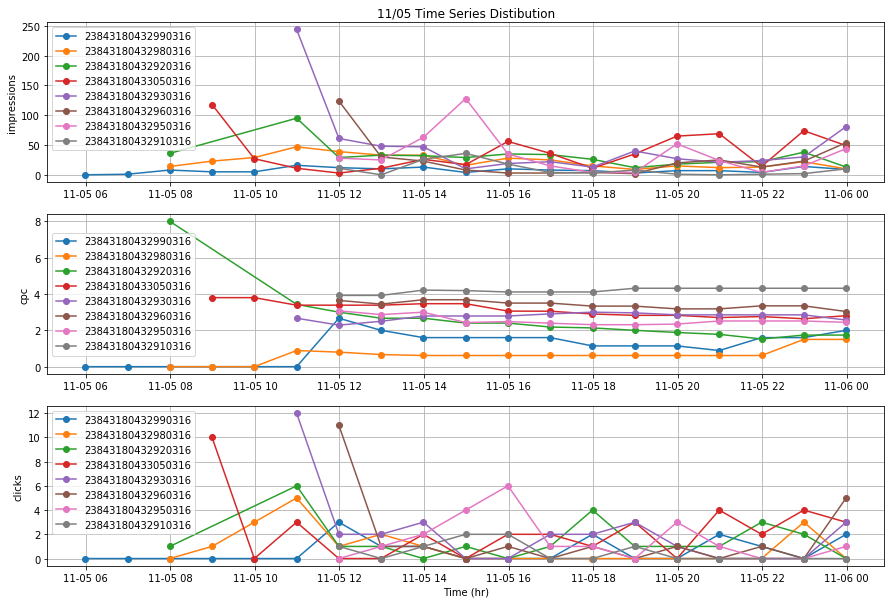

In [11]:
fig=plt.figure(figsize=(15,10))

for ad in ad_list:
    # plot 1
    plt.subplot(3, 1, 1)
#     plt.xlabel('Time (hr)')
    plt.ylabel('impressions')
    plt.title('11/05 Time Series Distibution')
    plt.grid(True)
    
    plt.plot(df_camp1105['request_time'][df_camp1105.ad_id==ad],df_camp1105['delta_impressions'][df_camp1105.ad_id==ad],'o-', label=ad)
    plt.legend()
    # plot 2
    
    plt.subplot(3, 1, 2)
#     plt.xlabel('Time (hr)')
    plt.ylabel('cpc')
#     plt.title('Time Series Distibution')
    plt.grid(True)
    
    plt.plot(df_camp1105['request_time'][df_camp1105.ad_id==ad],df_camp1105['cpc'][df_camp1105.ad_id==ad],'o-',label=ad)
    plt.legend()
    
    # plot 3
    plt.subplot(3, 1, 3)
    plt.xlabel('Time (hr)')
    plt.ylabel('clicks')
#     plt.title('Time Series Distibution')
    plt.grid(True)
    
    plt.plot(df_camp1105['request_time'][df_camp1105.ad_id==ad],df_camp1105['delta_clicks'][df_camp1105.ad_id==ad],'o-',label=ad)
    plt.legend()

In [12]:
date = datetime.date(2018,11,6)
minute = datetime.time(11,59,20).minute
df = df_camp[ (df_camp.request_time.dt.date == date) & (df_camp.request_time.dt.minute == minute) ]
ad_list=df['ad_id'].unique()
df = df.sort_values(by=['ad_id','request_time']).reset_index(drop=True)
df['delta_clicks'] = df['clicks'] - df['clicks'].shift(1)
df['delta_impressions'] = df['impressions'] - df['impressions'].shift(1)
df = df[ (df.delta_clicks >=0) | (df.delta_impressions >= 0)]

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


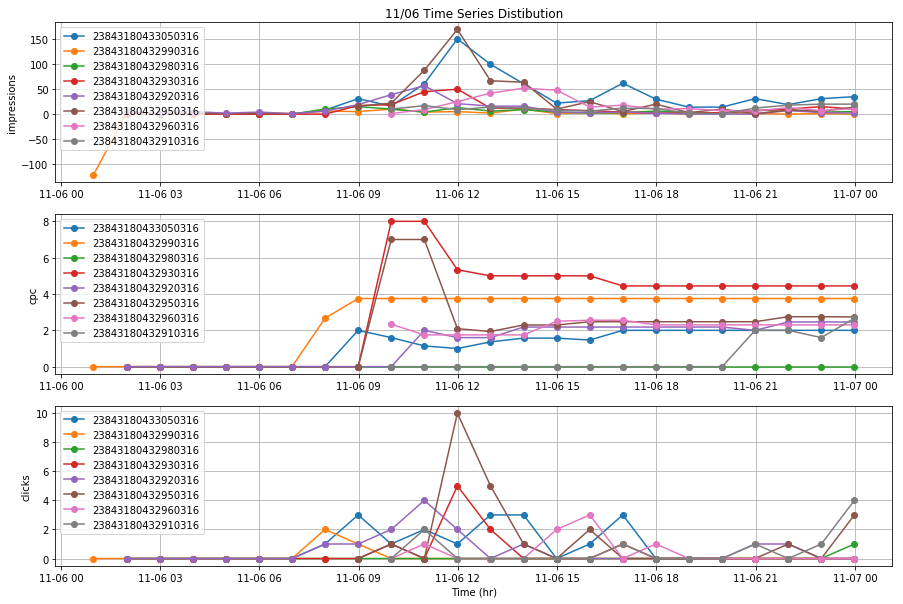

In [13]:
fig=plt.figure(figsize=(15,10))

for ad in ad_list:
    # plot 1
    plt.subplot(3, 1, 1)
#     plt.xlabel('Time (hr)')
    plt.ylabel('impressions')
    plt.title('11/06 Time Series Distibution')
    plt.grid(True)
    
    plt.plot(df['request_time'][df.ad_id==ad],df['delta_impressions'][df.ad_id==ad],'o-', label=ad)
    plt.legend()
    # plot 2
    
    plt.subplot(3, 1, 2)
#     plt.xlabel('Time (hr)')
    plt.ylabel('cpc')
#     plt.title('Time Series Distibution')
    plt.grid(True)
    
    plt.plot(df['request_time'][df.ad_id==ad],df['cpc'][df.ad_id==ad],'o-',label=ad)
    plt.legend()
    
    # plot 3
    plt.subplot(3, 1, 3)
    plt.xlabel('Time (hr)')
    plt.ylabel('clicks')
#     plt.title('Time Series Distibution')
    plt.grid(True)
    
    plt.plot(df['request_time'][df.ad_id==ad],df['delta_clicks'][df.ad_id==ad],'o-',label=ad)
    plt.legend()

In [14]:
date = datetime.date(2018,11,7)
minute = datetime.time(11,59,20).minute
df = df_camp[ (df_camp.request_time.dt.date == date) & (df_camp.request_time.dt.minute == minute) ]
ad_list=df['ad_id'].unique()
df = df.sort_values(by=['ad_id','request_time']).reset_index(drop=True)
df['delta_clicks'] = df['clicks'] - df['clicks'].shift(1)
df['delta_impressions'] = df['impressions'] - df['impressions'].shift(1)
df = df[ (df.delta_clicks >=0) | (df.delta_impressions >= 0)]

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


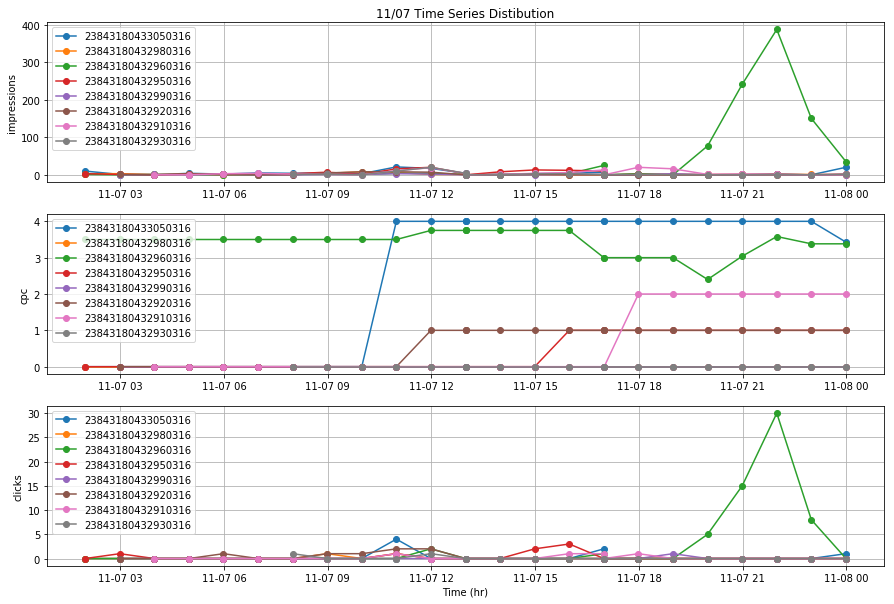

In [15]:
fig=plt.figure(figsize=(15,10))

for ad in ad_list:
    # plot 1
    plt.subplot(3, 1, 1)
#     plt.xlabel('Time (hr)')
    plt.ylabel('impressions')
    plt.title('11/07 Time Series Distibution')
    plt.grid(True)
    
    plt.plot(df['request_time'][df.ad_id==ad],df['delta_impressions'][df.ad_id==ad],'o-', label=ad)
    plt.legend()
    # plot 2
    
    plt.subplot(3, 1, 2)
#     plt.xlabel('Time (hr)')
    plt.ylabel('cpc')
#     plt.title('Time Series Distibution')
    plt.grid(True)
    
    plt.plot(df['request_time'][df.ad_id==ad],df['cpc'][df.ad_id==ad],'o-',label=ad)
    plt.legend()
    
    # plot 3
    plt.subplot(3, 1, 3)
    plt.xlabel('Time (hr)')
    plt.ylabel('clicks')
#     plt.title('Time Series Distibution')
    plt.grid(True)
    
    plt.plot(df['request_time'][df.ad_id==ad],df['delta_clicks'][df.ad_id==ad],'o-',label=ad)
    plt.legend()

In [16]:
date = datetime.date(2018,11,8)
minute = datetime.time(11,59,20).minute
df = df_camp[ (df_camp.request_time.dt.date == date) & (df_camp.request_time.dt.minute == minute) ]
ad_list=df['ad_id'].unique()
df = df.sort_values(by=['ad_id','request_time']).reset_index(drop=True)
df['delta_clicks'] = df['clicks'] - df['clicks'].shift(1)

df['delta_impressions'] = df['impressions'] - df['impressions'].shift(1)
df = df[ (df.delta_clicks >=0) | (df.delta_impressions >= 0)]

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


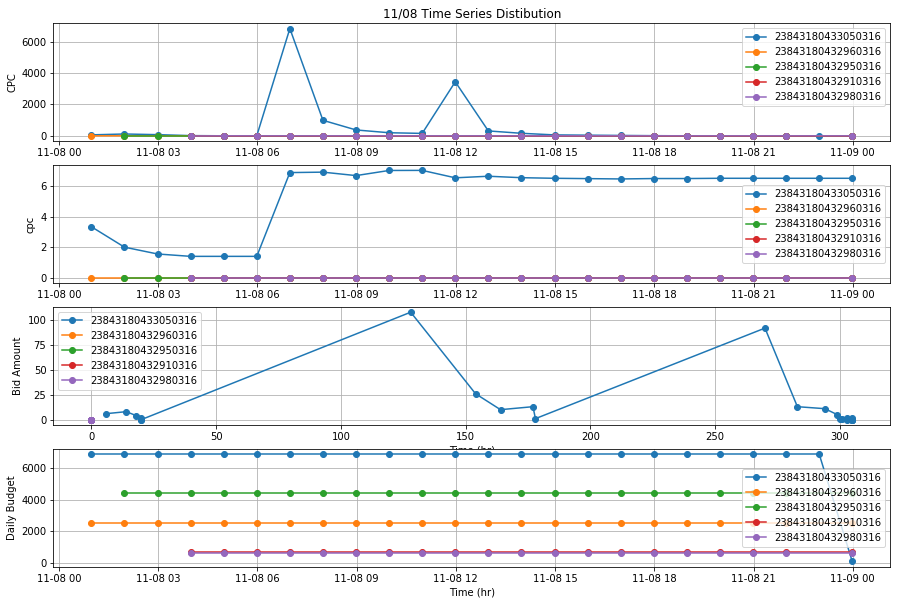

In [17]:
fig=plt.figure(figsize=(15,10))

for ad in ad_list:
    # plot 1
    plt.subplot(4, 1, 1)
#     plt.xlabel('Time (hr)')
    plt.ylabel('CPC')
    plt.title('11/08 Time Series Distibution')
    plt.grid(True)
    
    plt.plot(df['request_time'][df.ad_id==ad],df['delta_impressions'][df.ad_id==ad],'o-', label=ad)
    plt.legend()
    # plot 2
    
    plt.subplot(4, 1, 2)
#     plt.xlabel('Time (hr)')
    plt.ylabel('cpc')
#     plt.title('Time Series Distibution')
    plt.grid(True)
    
    plt.plot(df['request_time'][df.ad_id==ad],df['cpc'][df.ad_id==ad],'o-',label=ad)
    plt.legend()
    
    # plot 3
    plt.subplot(4, 1, 3)
    plt.xlabel('Time (hr)')
    plt.ylabel('Bid Amount')
#     plt.title('Time Series Distibution')
    plt.grid(True)
    
    plt.plot(df['clicks'][df.ad_id==ad],df['delta_clicks'][df.ad_id==ad],'o-',label=ad)
    plt.legend()
    
        # plot 3
    plt.subplot(4, 1, 4)
    plt.xlabel('Time (hr)')
    plt.ylabel('Daily Budget')
#     plt.title('Time Series Distibution')
    plt.grid(True)
    
    plt.plot(df['request_time'][df.ad_id==ad],df['daily_budget'][df.ad_id==ad],'o-',label=ad)
    plt.legend()

In [18]:
date = datetime.date(2018,11,9)
minute = datetime.time(11,59,20).minute
df = df_camp[ (df_camp.request_time.dt.date == date) & (df_camp.request_time.dt.minute == minute) ]
ad_list=df['ad_id'].unique()
df = df.sort_values(by=['ad_id','request_time']).reset_index(drop=True)
df['delta_clicks'] = df['clicks'] - df['clicks'].shift(1)
df['delta_impressions'] = df['impressions'] - df['impressions'].shift(1)
df = df[ (df.delta_clicks >=0) | (df.delta_impressions >= 0)]

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


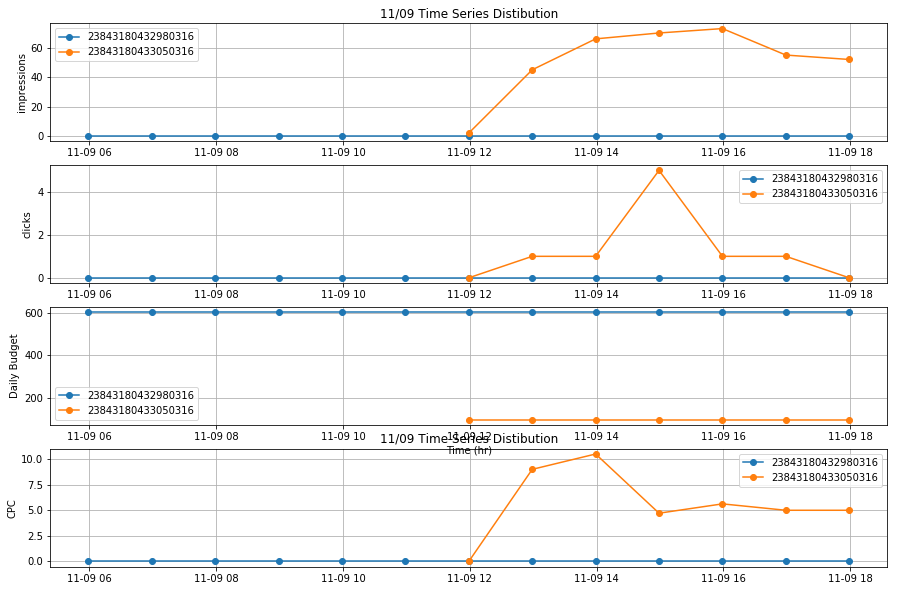

In [19]:
fig=plt.figure(figsize=(15,10))

for ad in ad_list:
        # plot 1
    plt.subplot(4, 1, 4)
#     plt.xlabel('Time (hr)')
    plt.ylabel('CPC')
    plt.title('11/09 Time Series Distibution')
    plt.grid(True)
    
    plt.plot(df['request_time'][df.ad_id==ad],df['cpc'][df.ad_id==ad],'o-', label=ad)
    plt.legend()
    # plot 1
    plt.subplot(4, 1, 1)
#     plt.xlabel('Time (hr)')
    plt.ylabel('impressions')
    plt.title('11/09 Time Series Distibution')
    plt.grid(True)
    
    plt.plot(df['request_time'][df.ad_id==ad],df['delta_impressions'][df.ad_id==ad],'o-', label=ad)
    plt.legend()
    # plot 2
    
    plt.subplot(4, 1, 2)
#     plt.xlabel('Time (hr)')
    plt.ylabel('clicks')
#     plt.title('Time Series Distibution')
    plt.grid(True)
    
    plt.plot(df['request_time'][df.ad_id==ad],df['delta_clicks'][df.ad_id==ad],'o-',label=ad)
    plt.legend()
    
    # plot 3
    plt.subplot(4, 1, 3)
    plt.xlabel('Time (hr)')
    plt.ylabel('Daily Budget')
#     plt.title('Time Series Distibution')
    plt.grid(True)
    
    plt.plot(df['request_time'][df.ad_id==ad],df['daily_budget'][df.ad_id==ad],'o-',label=ad)
    plt.legend()